# **Name : Burhanuddin Abizer Hariyanawala**
## **CID- LGMVIPDSWL0011437**
## **Intermediate Task 1**
### Exploratory Data Analysis on Dataset - Terrorism

Find out the hot zones of terrorism.


In [1]:
# Basic Data Exploration and Visualization Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)


In [3]:
data = pd.read_csv('/content/globalterrorismdb_0718dist.csv' , encoding='ISO-8859-1')
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [4]:
data.shape

(181691, 135)

In [5]:
null_values = data.isnull().sum().sort_values(ascending=False)
print(null_values)

gsubname3             181671
weapsubtype4_txt      181621
weapsubtype4          181621
weaptype4             181618
weaptype4_txt         181618
claimmode3            181558
claimmode3_txt        181558
gsubname2             181531
claim3                181373
guncertain3           181371
gname3                181367
divert                181367
attacktype3           181263
attacktype3_txt       181263
ransomnote            181177
ransompaidus          181139
ransomamtus           181128
claimmode2            181075
claimmode2_txt        181075
ransompaid            180917
corp3                 180665
targsubtype3          180594
targsubtype3_txt      180594
natlty3_txt           180544
natlty3               180544
target3               180516
targtype3             180515
targtype3_txt         180515
ransomamt             180341
weapsubtype3_txt      179998
weapsubtype3          179998
weaptype3_txt         179828
weaptype3             179828
claim2                179801
guncertain2   

In [6]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':"Country",'region_txt':'Region','attacktype1_txt':"AttackType"
                      , 'weaptype1_txt':'WeaponType' , 'motive':'Motive' , 'gname' : "Group" , 'nwound' : "Wounded" , 'nkill' : 'Kill' ,
                      'target1':'Target' , 'targtype1_txt' : 'Target_type' , 'summary':"Summary"} , inplace=True)

data=data[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Kill','Wounded','Target','Summary','Group','Target_type','WeaponType','Motive']]

In [7]:
data_copy = data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   city         181257 non-null  object 
 6   latitude     177135 non-null  float64
 7   longitude    177134 non-null  float64
 8   AttackType   181691 non-null  object 
 9   Kill         171378 non-null  float64
 10  Wounded      165380 non-null  float64
 11  Target       181055 non-null  object 
 12  Summary      115562 non-null  object 
 13  Group        181691 non-null  object 
 14  Target_type  181691 non-null  object 
 15  WeaponType   181691 non-null  object 
 16  Motive       50561 non-null   object 
dtypes: float64(4), int64(3), object(10)
memory usage: 23.6+ MB


In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172176 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         172176 non-null  int64  
 1   Month        172176 non-null  int64  
 2   Day          172176 non-null  int64  
 3   Country      172176 non-null  object 
 4   Region       172176 non-null  object 
 5   city         171742 non-null  object 
 6   latitude     168166 non-null  float64
 7   longitude    168165 non-null  float64
 8   AttackType   172176 non-null  object 
 9   Kill         162744 non-null  float64
 10  Wounded      156910 non-null  float64
 11  Target       171632 non-null  object 
 12  Summary      113101 non-null  object 
 13  Group        172176 non-null  object 
 14  Target_type  172176 non-null  object 
 15  WeaponType   172176 non-null  object 
 16  Motive       49909 non-null   object 
dtypes: float64(4), int64(3), object(10)
memory usage: 23.6+ MB


In [10]:
data.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              434
latitude         4010
longitude        4011
AttackType          0
Kill             9432
Wounded         15266
Target            544
Summary         59075
Group               0
Target_type         0
WeaponType          0
Motive         122267
dtype: int64

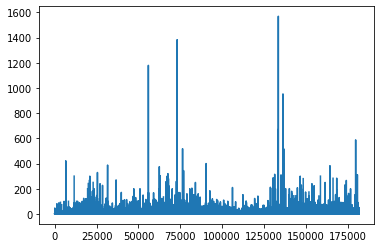

In [11]:
plt.plot(data['Kill'])
plt.show()

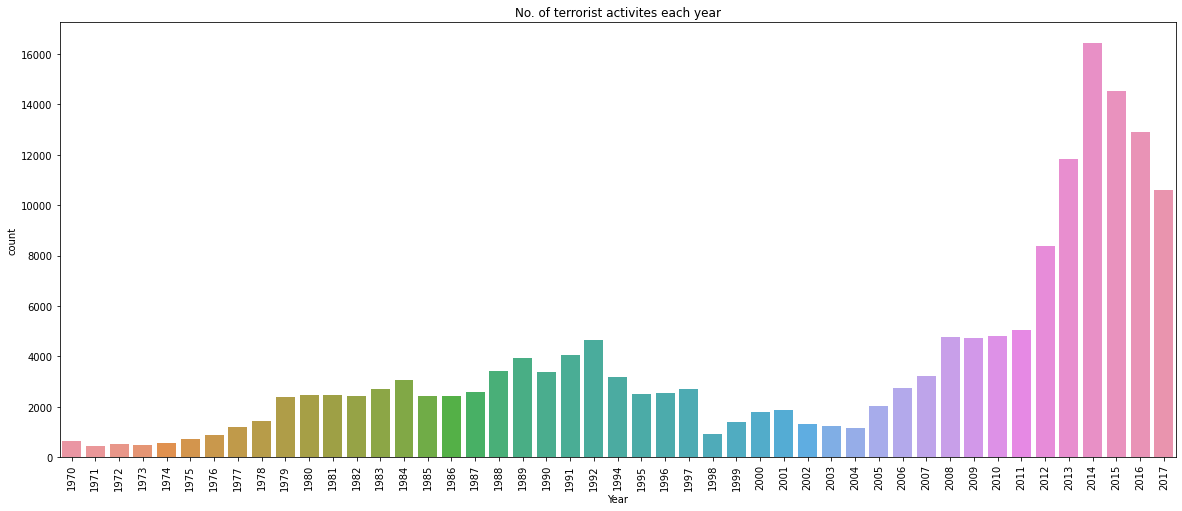

In [12]:
plt.subplots(figsize=(20,8))
sns.countplot(x='Year',data=data )
plt.xticks(rotation=90)
plt.title("No. of terrorist activites each year")
plt.show()

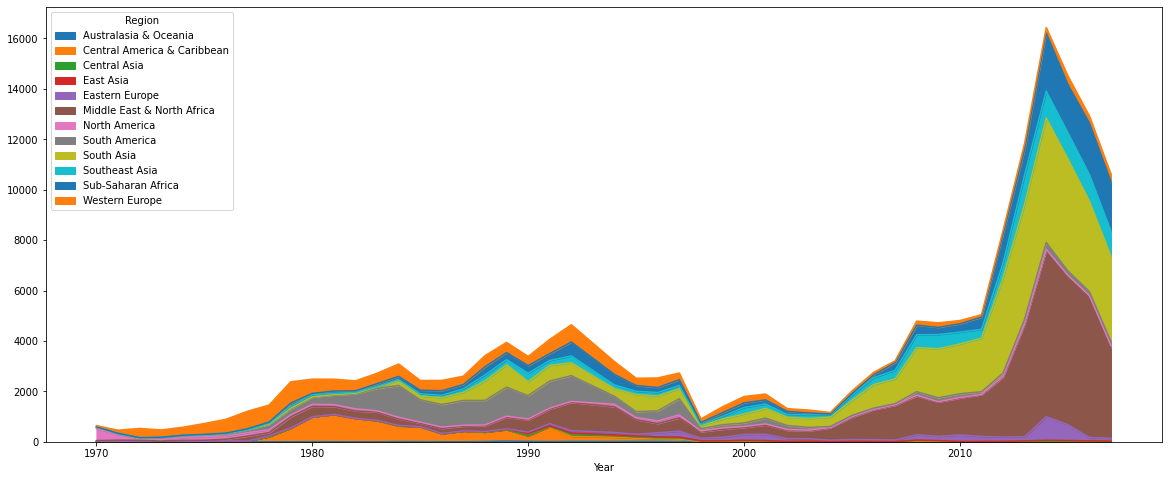

In [13]:
pd.crosstab( data['Year'] ,data['Region'] ).plot(kind='area' , figsize=(20,8) )
plt.show()

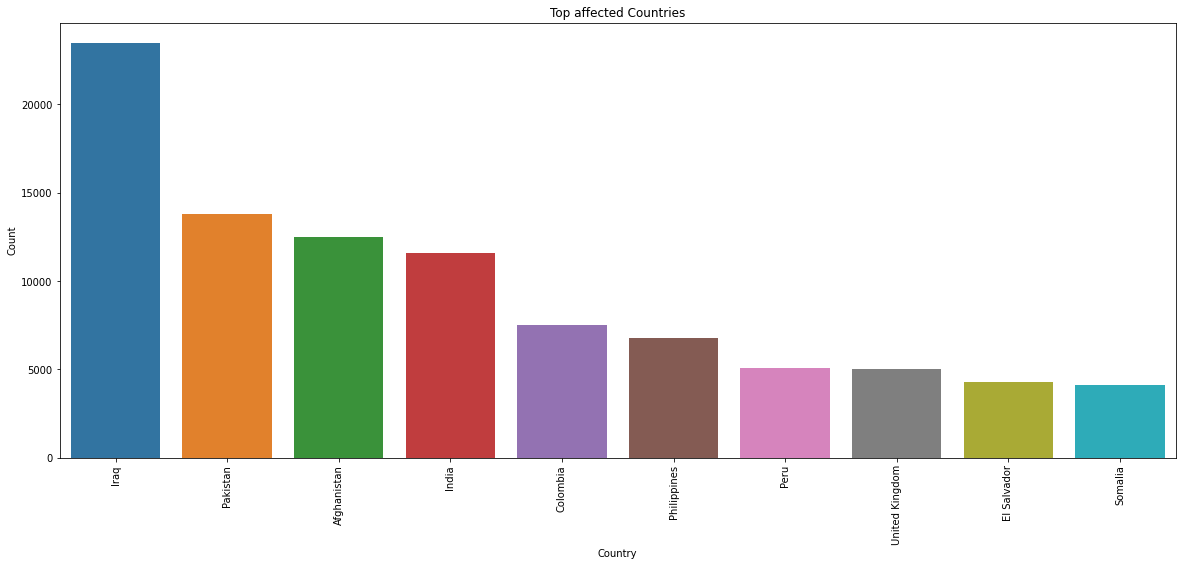

In [14]:
plt.subplots(figsize=(20,8))
top_attacked_countries = data['Country'].value_counts()[:10].to_frame().reset_index()
top_attacked_countries.columns = ['Country' , 'Count']

sns.barplot(x='Country' , y="Count" , data=top_attacked_countries)
plt.title("Top affected Countries")
plt.xticks(rotation=90)
plt.show()


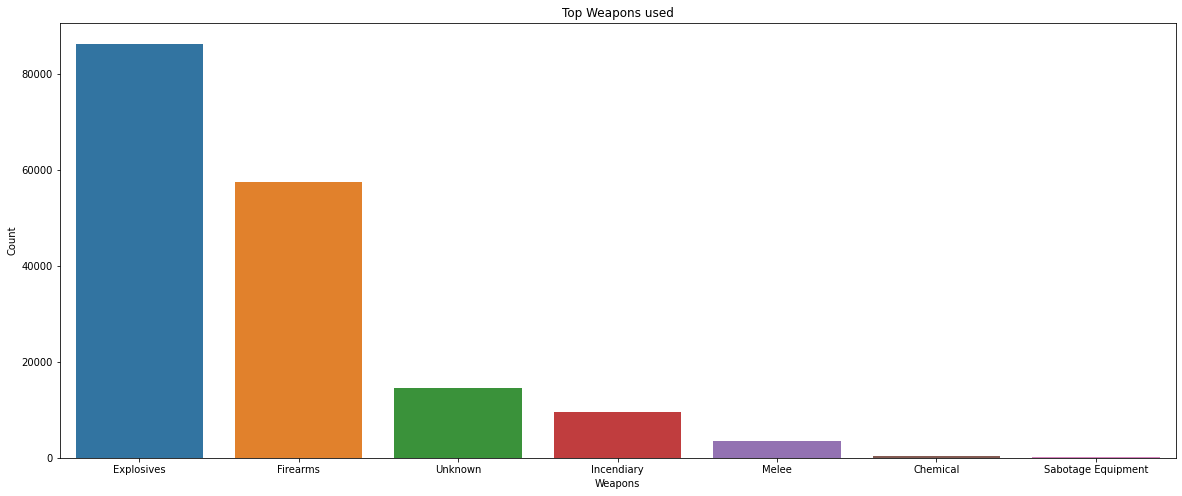

In [15]:
plt.subplots(figsize=(20,8))
top_weapons_used = data['WeaponType'].value_counts()[:7].to_frame().reset_index()
top_weapons_used.columns = ['Weapons' , 'Count']

sns.barplot(x='Weapons' , y="Count" , data=top_weapons_used)
plt.title("Top Weapons used")

plt.show()

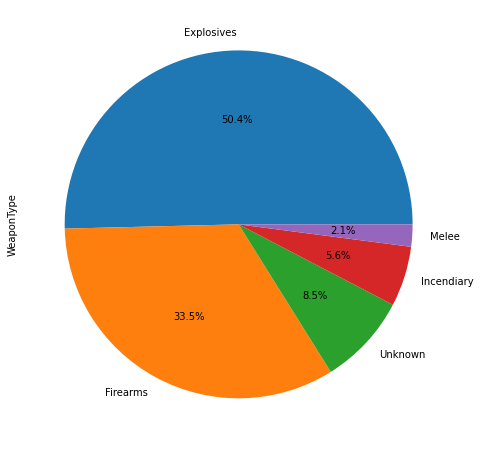

In [16]:
top_5_weapon = data["WeaponType"].value_counts()[:5]
top_5_weapon.plot(kind="pie",figsize=(20,8) , autopct='%1.1f%%')
plt.show()

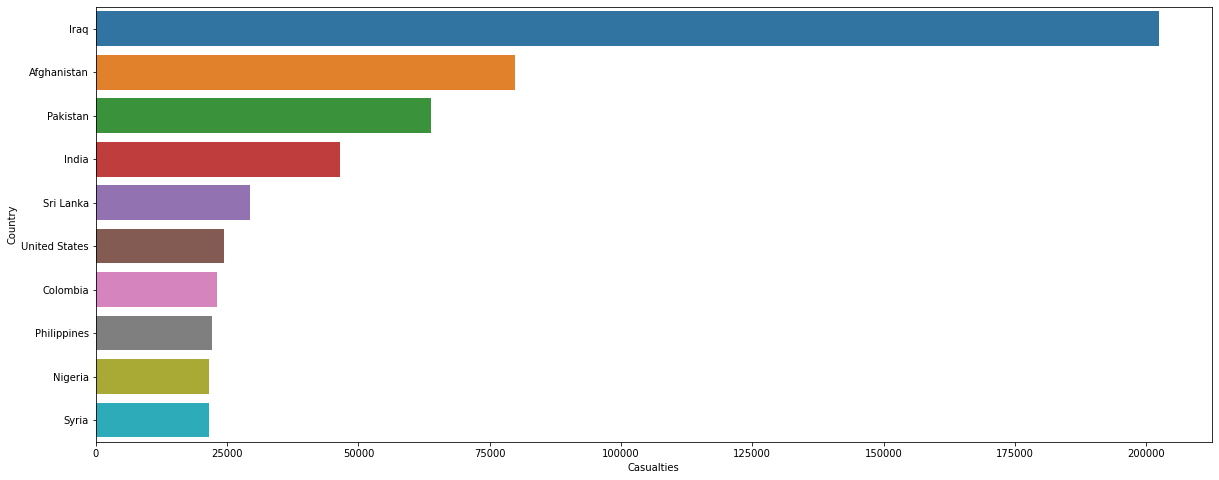

In [17]:
plt.subplots(figsize=(20,8))

data['Casualties'] = data['Kill'] + data['Wounded']

top_casualty_count = data.groupby('Country').Casualties.sum().to_frame().reset_index().sort_values('Casualties',ascending=False)[:10]

sns.barplot(x=top_casualty_count.Casualties , y=top_casualty_count.Country ,orient='h')

plt.show()

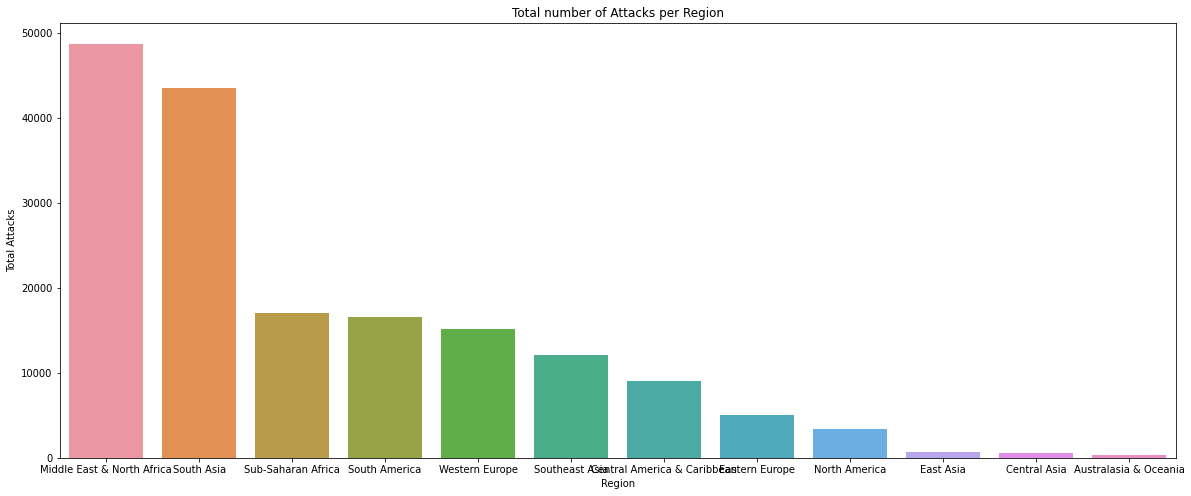

In [18]:
plt.subplots(figsize=(20,8))
total_attacks_region = data['Region'].value_counts().to_frame().reset_index()
total_attacks_region.columns = ['Region' , 'Total Attacks']
plt.title("Total number of Attacks per Region")
sns.barplot(x="Region",y="Total Attacks" , data=total_attacks_region  )
plt.show()

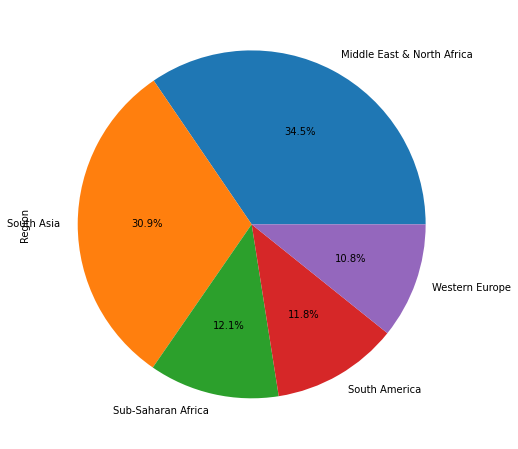

In [20]:
top_5_regions = data['Region'].value_counts()[:5]
top_5_regions.plot(kind='pie' , autopct='%1.1f%%' , figsize=(20,8))
plt.show()

In [23]:
Mid_north = data[data.Region == "Middle East & North Africa"]
Mid_north.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Kill,Wounded,Target,Summary,Group,Target_type,WeaponType,Motive,Casualties
95,1970,2,28,Jordan,Middle East & North Africa,Hebron,31.530243,35.094162,Armed Assault,NaN,NaN,Tourist Bus,NaN,Unknown,Tourists,Firearms,NaN,NaN
133,1970,3,14,Egypt,Middle East & North Africa,Alexandria,31.198056,29.919167,Bombing/Explosion,0.0,2.0,United Arab Airlines Flight Antonov 24 Acft,NaN,Unknown,Airports & Aircraft,Explosives,NaN,2.0
158,1970,3,29,Lebanon,Middle East & North Africa,Beirut,33.888523,35.503513,Bombing/Explosion,0.0,0.0,U.S. Embassy,NaN,Popular Front for the Liberation of Palestine ...,Government (Diplomatic),Explosives,NaN,0.0
195,1970,4,15,Jordan,Middle East & North Africa,Amman,31.950001,35.933331,Bombing/Explosion,0.0,0.0,US Embassy,NaN,Popular Front for the Liberation of Palestine ...,Government (Diplomatic),Explosives,NaN,0.0
226,1970,4,25,Turkey,Middle East & North Africa,Istanbul,41.106178,28.689863,Bombing/Explosion,0.0,0.0,EL AL Office,NaN,Palestinians,Airports & Aircraft,Explosives,NaN,0.0


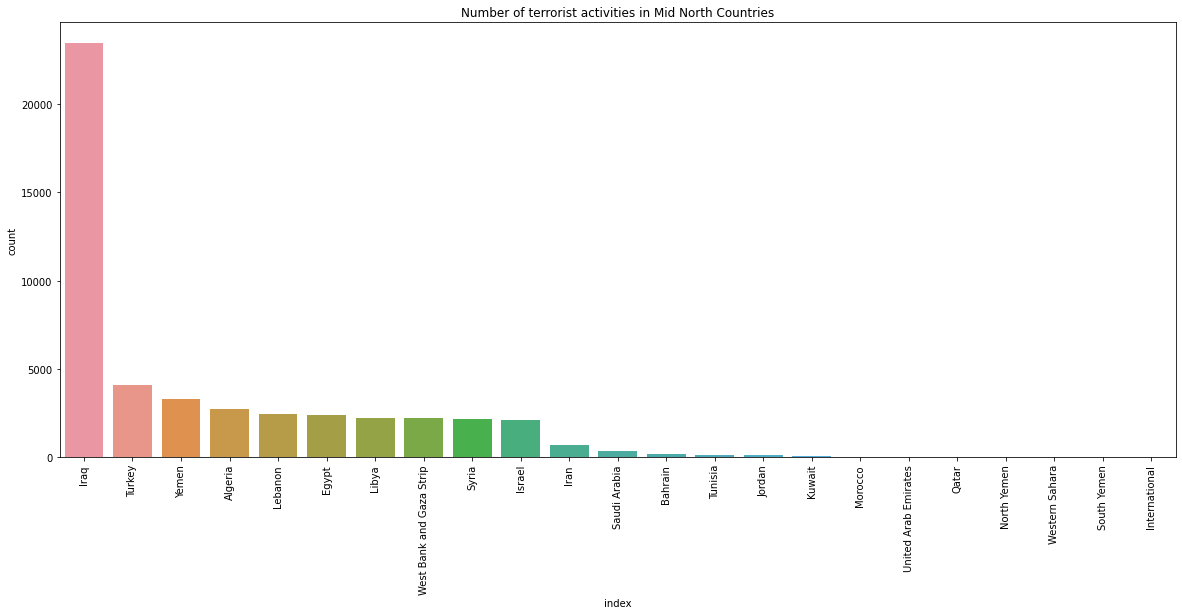

In [39]:
plt.subplots(figsize=(20,8))

terror_act_midNorth = Mid_north['Country'].value_counts().reset_index(name='count')
# Mid_north['Country'].value_counts().to_frame().reset_index()
# terror_act_midNorth.columns = ['Country' , 'Count']

sns.barplot(x='index' , y='count' , data=terror_act_midNorth)
plt.title("Number of terrorist activities in Mid North Countries")
plt.xticks(rotation=90)
plt.show()

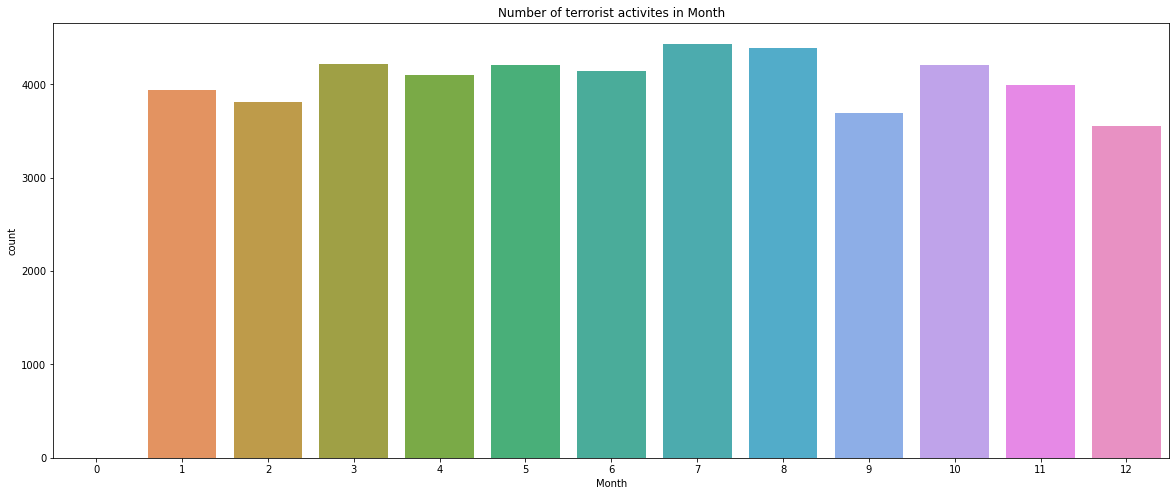

In [41]:
plt.subplots(figsize=(20,8))

sns.countplot(x="Month" , data=Mid_north )
plt.xlabel("Month")
plt.title("Number of terrorist activites in Month")
plt.show()

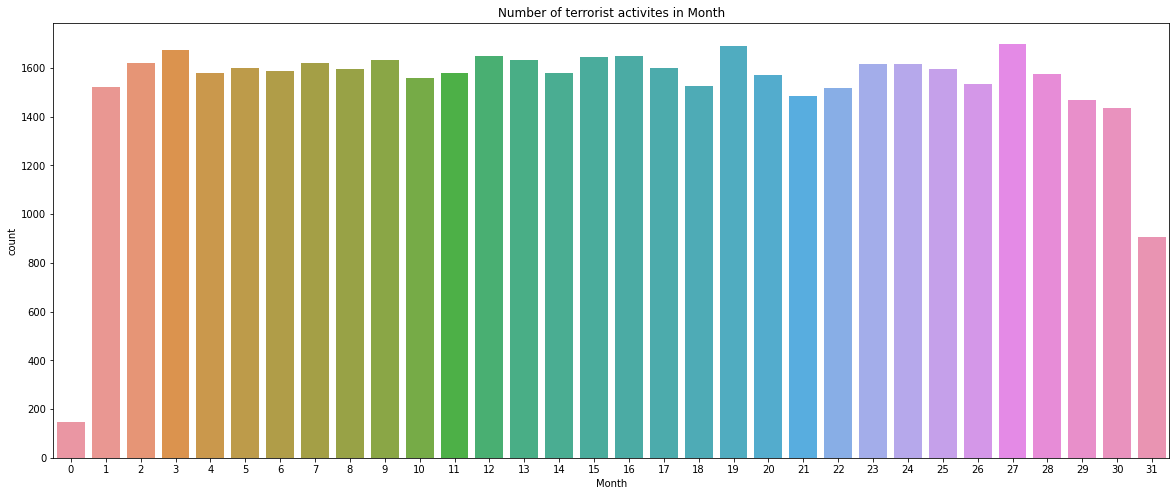

In [42]:
plt.subplots(figsize=(20,8))

sns.countplot(x="Day" , data=Mid_north )
plt.xlabel("Month")
plt.title("Number of terrorist activites in Month")
plt.show()

<Axes: ylabel='Country'>

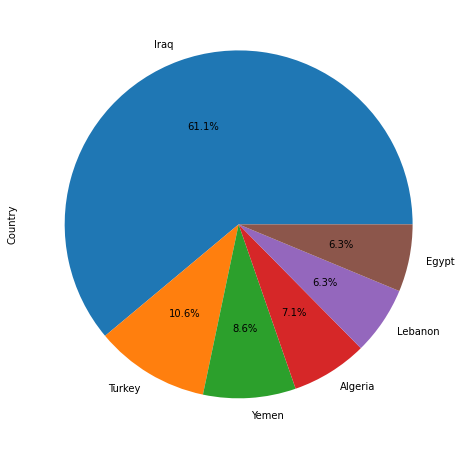

In [43]:
top_5_midNorth_country = Mid_north['Country'].value_counts()[:6]

top_5_midNorth_country.plot(kind='pie' , autopct="%1.1f%%" , figsize=(20,8))

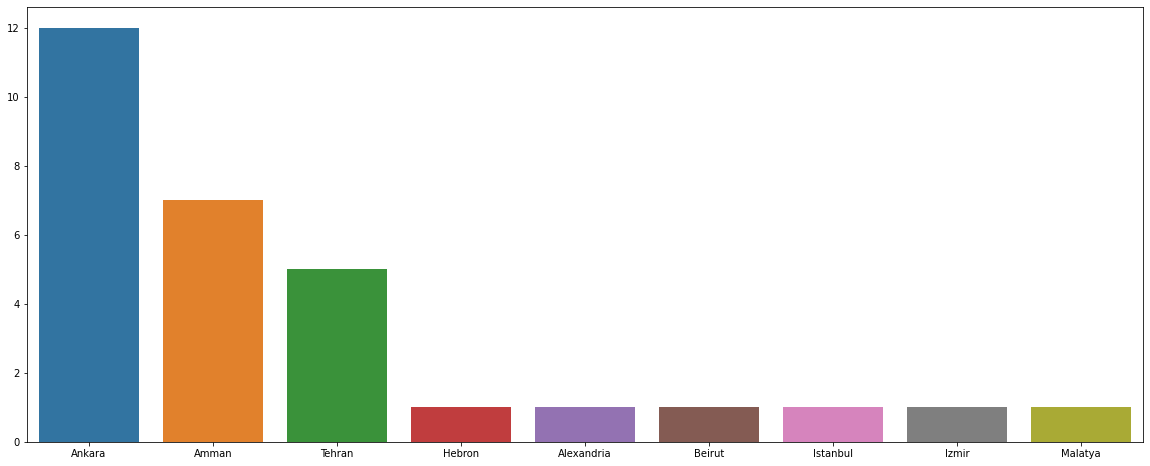

In [53]:
top_30_city = Mid_north.head(30)
plt.subplots(figsize=(20,8))
x = top_30_city['city'].value_counts().index
y = top_30_city['city'].value_counts().values
sns.barplot(x=x , y=y )
plt.show()

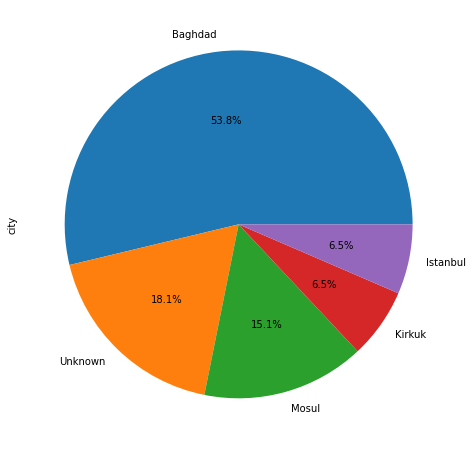

In [55]:
top_5_city = Mid_north['city'].value_counts()[:5]
top_5_city.plot(kind="pie" , autopct="%1.1f%%" , figsize=(20,8))
plt.show()

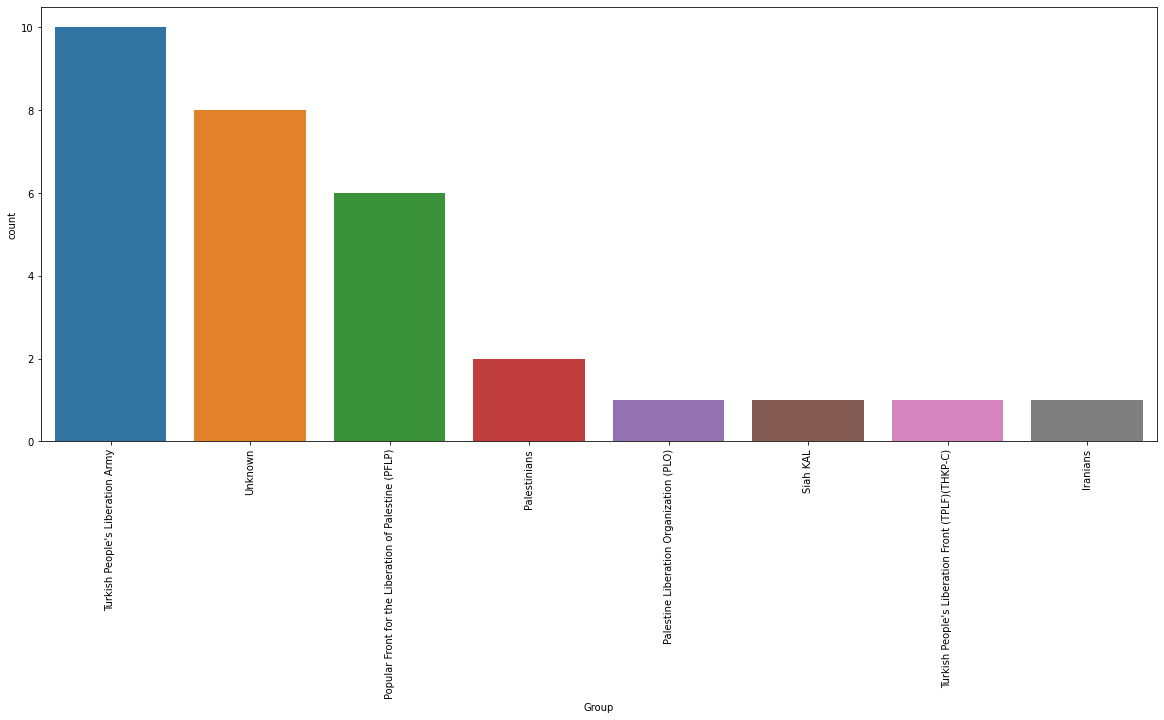

In [62]:
top_30_group = Mid_north.head(30)
plt.subplots(figsize=(20,8))
sns.countplot(x="Group" , data=top_30_group , order=top_30_group.Group.value_counts().index)
plt.xticks(rotation=90)
plt.show()

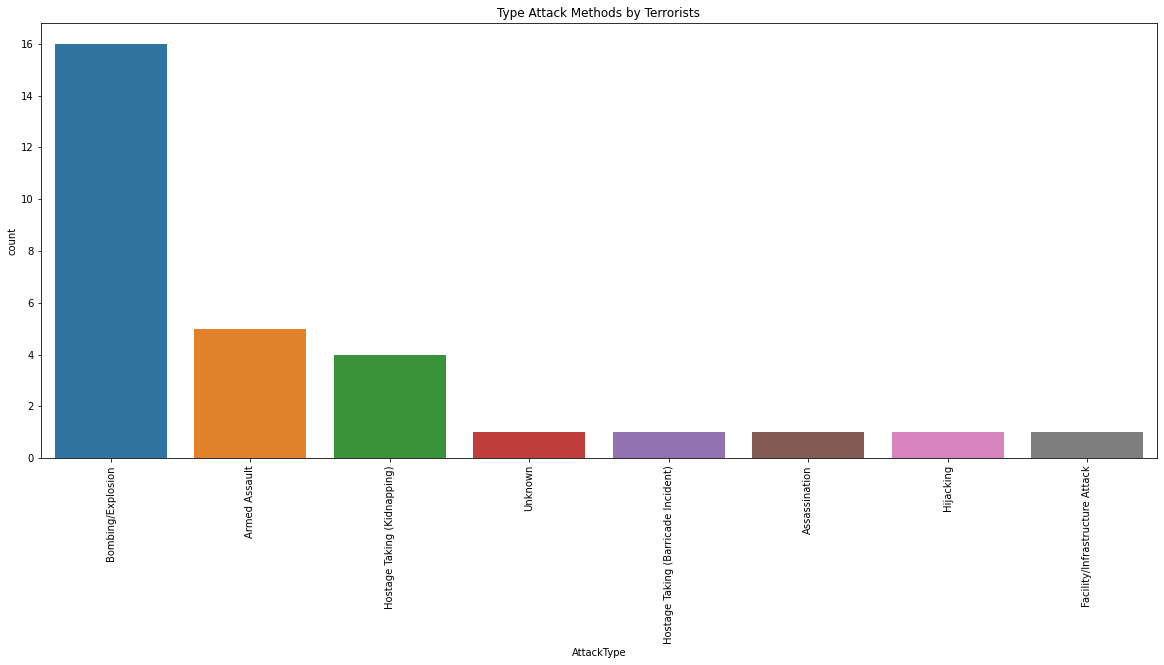

In [65]:
top_30_Att=Mid_north.head(30)
plt.subplots(figsize=(20,8))
sns.countplot(x = 'AttackType',data=top_30_Att,order=top_30_Att.AttackType.value_counts().index)

plt.xticks(rotation=90)
plt.title('Type Attack Methods by Terrorists')
plt.show()

In [77]:
number_of_affected = Mid_north[['Country','Wounded','Kill','Casualties']]

number_of_affected.groupby(by='Country').sum().reset_index().sort_values(by='Casualties',ascending=False)

,Country,Wounded,Kill,Casualties
5,Iraq,134296.0,78346.0,202394.0
16,Syria,14007.0,15044.0,21460.0
0,Algeria,9056.0,10973.0,19109.0
18,Turkey,9885.0,6878.0,16670.0
22,Yemen,9183.0,8691.0,16071.0
9,Lebanon,10890.0,4045.0,14735.0
6,Israel,7930.0,1703.0,9410.0
2,Egypt,4789.0,3826.0,8579.0
4,Iran,4029.0,1673.0,5623.0
10,Libya,3310.0,2595.0,5504.0


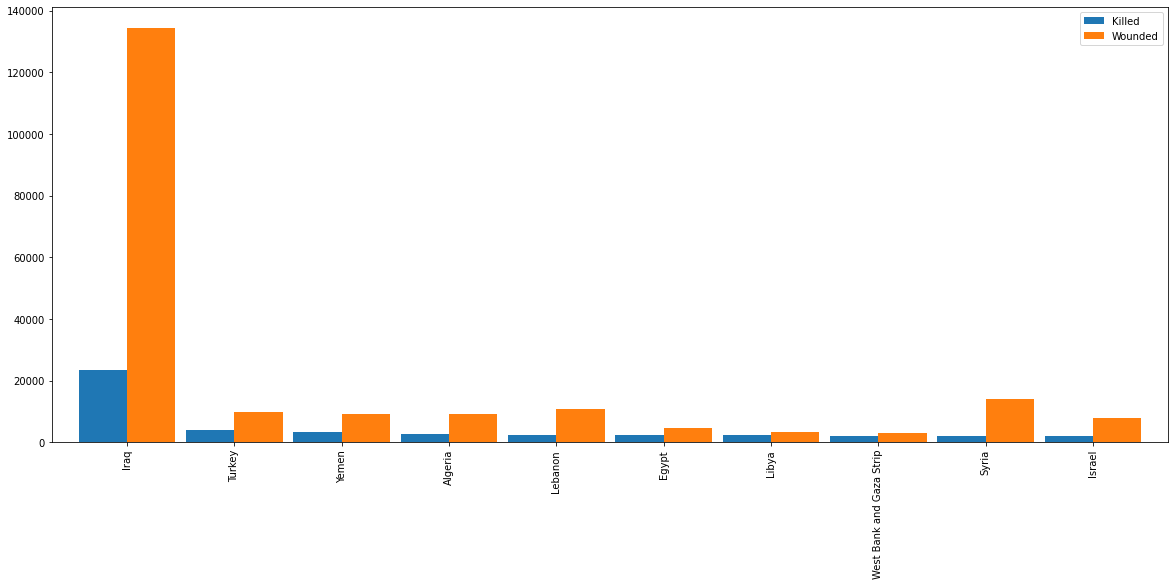

In [94]:
count_terror = Mid_north['Country'].value_counts()[:10].to_frame()
count_terror.columns = ['Killed']

count_kill = Mid_north.groupby('Country').Wounded.sum().to_frame()

count_terror.merge(count_kill , left_index=True , right_index=True , how='left').plot(kind="bar" , width=0.9)
fig = plt.gcf()
fig.set_size_inches(20,8)
plt.show()

In [101]:
group_killed = Mid_north[['Group','Kill']].groupby("Group" , axis=0).sum().sort_values('Kill' , ascending=False)
group_killed

,Kill
Group,
Unknown,53530.0
Islamic State of Iraq and the Levant (ISIL),38435.0
Kurdistan Workers' Party (PKK),4946.0
Al-Qaida in Iraq,4341.0
Al-Qaida in the Arabian Peninsula (AQAP),3552.0
Houthi extremists (Ansar Allah),3021.0
Al-Nusrah Front,2932.0
Islamic State of Iraq (ISI),1726.0
Sinai Province of the Islamic State,1606.0


In [102]:
Mid_north.Summary.value_counts().sort_values(ascending=False).head(10)

10/09/2012: Assailants threw incendiary devices and rocks at a school in Idil city, Sirnak province, Turkey. This was one of eight coordinated attacks carried out simultaneously in the area on this date. Two individuals were injured across all eight events. No group claimed responsibility for the incident; however, authorities suspected the Kurdistan Workers' Party (PKK).                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      7
2/0/2003: In a series of seven related incidents, between mid-February to mid-May 2003, a total of thirty-